# Итоговая работа по теме "Прогнозирование оттока клиентов из банка"

Был взят датасет, в котором клиенты имеющие различные характеристики имеют признак покинули они банк или продолжают быть его клиентами.

С помощью данного датасета была обучена модель, которая впоследствии может предсказывать на основе данных других клиентов покинут ли они банк или останутся в нем.

Более подробно все описано в пояснительной записке к итоговой работе.

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

In [42]:
df = pd.read_csv('https://raw.githubusercontent.com/AlexPolus/AI_architecture/main/final_work/Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


Столбцы в датасете характеризуют следующее

RowNumber - Номер строки

CustomerId - Идентификатор клиента

Surname - Фамилия клиента

CreditScore - Кредитный рейтинг

Geography - Страна пребывания

Gender - Пол

Age - Возраст

Tenure - Срок пребывания клиентом банка

Balance - Количество денег на счетах

NumOfProducts - Количество банковских продуктов

HasCrCard - Признак наличия кредитной карты (0 - не имеет, 1 - имеет)

IsActiveMember - Статус активности

EstimatedSalary - Предполагаемая ЗП

Exited - Покинул банк? (0 - нет, 1 - да)

### EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
df.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [6]:
# Удаление лишних столбцов
df = df.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [7]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [8]:
columns_name = list(df.columns)
columns_name.remove('Exited')
columns_name

['CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary']

### Обработка несбалансированных данных

In [9]:
from imblearn.over_sampling import RandomOverSampler

from collections import Counter

ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(df[columns_name], df['Exited'])

print(sorted(Counter(y_resampled).items()))

[(0, 7963), (1, 7963)]


In [10]:
df = pd.DataFrame()
df[columns_name] = X_resampled
df['Exited'] = y_resampled
print(df.shape)
df

(15926, 11)


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
15921,750,France,Female,37,6,0.00,1,1,1,117948.00,1
15922,692,Spain,Female,47,3,0.00,2,1,0,150802.41,1
15923,565,Germany,Male,52,5,97720.35,2,1,0,175070.94,1
15924,553,Spain,Female,48,3,0.00,1,0,1,30730.95,1


### Предварительная обработка данных

In [11]:
data_column_object = []
for column in df.columns:
    if df[column].dtype == 'object':
        data_column_object.append(column)
data_column_object

['Geography', 'Gender']

In [12]:
def uni(columnname):
    print(columnname,"--" ,df[columnname].unique())

In [13]:
dataobject=df.select_dtypes(['object'])
len(dataobject.columns)

2

In [14]:
for item in data_column_object:
    uni(item)

Geography -- ['France' 'Spain' 'Germany']
Gender -- ['Female' 'Male']


In [15]:
for item in data_column_object:
    df[item] = pd.factorize(df[item])[0]
    df[item] = df[item].astype('category')

In [16]:
for item in data_column_object:
    uni(item)

Geography -- [0, 1, 2]
Categories (3, int64): [0, 1, 2]
Gender -- [0, 1]
Categories (2, int64): [0, 1]


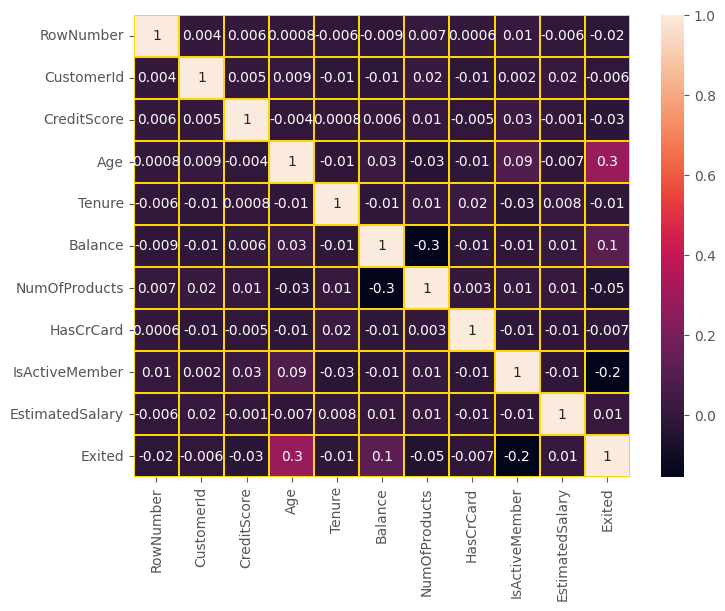

In [46]:
plt.style.use("ggplot")
f,ax=plt.subplots(figsize = (8,6))
sb.heatmap(df.corr(),robust=True,fmt='.1g',linewidths=1.3,linecolor = 'gold', annot=True,);

### Визуализация

Geography
0    3188
1    1589
2    3186
Name: Exited, dtype: int64


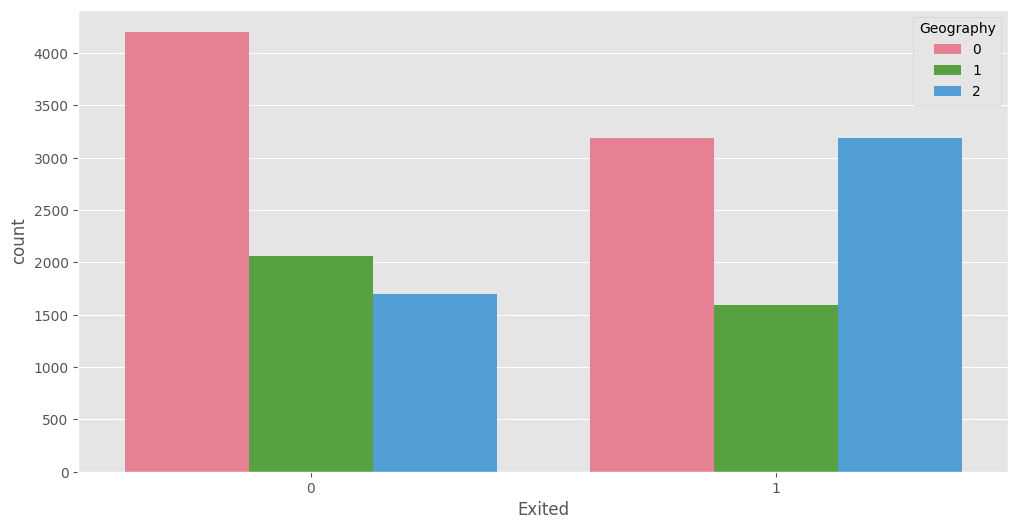

In [18]:
plt.figure(figsize = (12,6))
sb.countplot(x="Exited",hue = "Geography", data=df, palette="husl");
print(df.groupby('Geography')["Exited"].sum())

HasCrCard
0    2411
1    5552
Name: Exited, dtype: int64


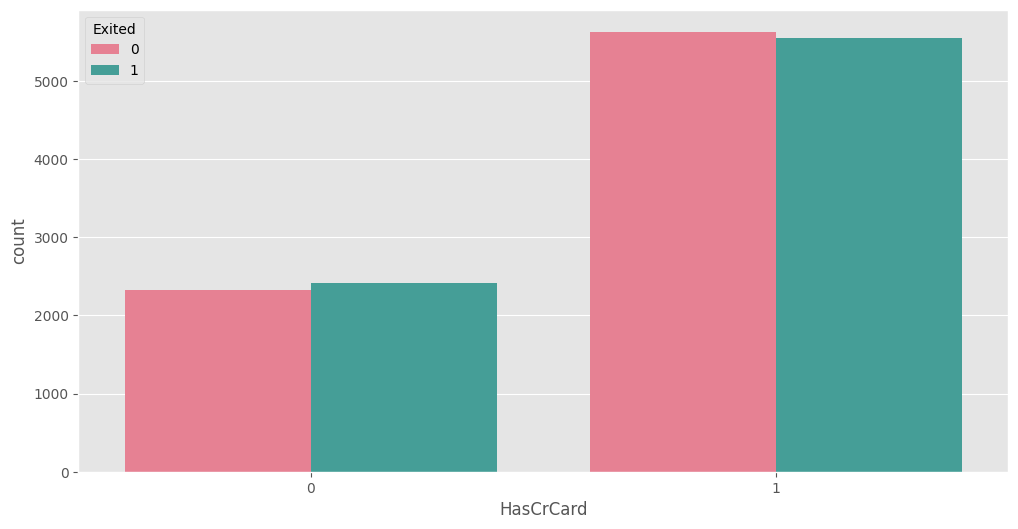

In [19]:
plt.figure(figsize = (12,6))
sb.countplot(x="HasCrCard",hue = "Exited", data=df, palette="husl");
print(df.groupby('HasCrCard')["Exited"].sum())

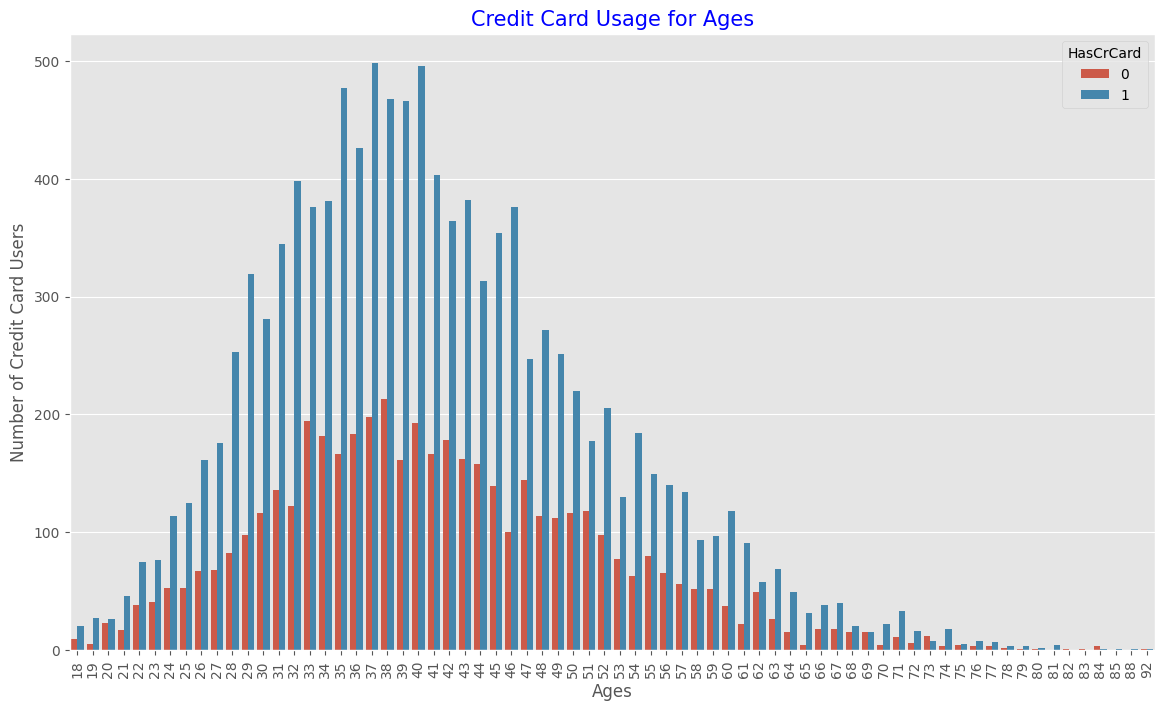

In [20]:
plt.figure(figsize = (14,8))
plt.xticks(rotation=90)
plt.title('Credit Card Usage for Ages',color = 'blue',fontsize=15)
sb.countplot(x=df["Age"],hue = 'HasCrCard',data=df);
plt.xlabel('Ages')
plt.ylabel('Number of Credit Card Users');

In [21]:
age_group_data = [None] * len(df['Age'])
for i in range(len(df['Age'])):
    if df['Age'][i] < 30:
        age_group_data[i] = 'Молодежь'
    elif df['Age'][i] >=30 and df['Age'][i] < 40:
        age_group_data[i] = 'Средний возраст'
    elif df['Age'][i] >=40 and df['Age'][i] < 50:
        age_group_data[i] = 'Взрослые'
    elif df['Age'][i] >=50 and df['Age'][i] < 60:
        age_group_data[i] = 'Пожилые'
    elif df['Age'][i] >=60 and df['Age'][i] < 74:
        age_group_data[i] = 'Старые'
    else:
        age_group_data[i] = 'Очень старые'

df['age_group'] = age_group_data

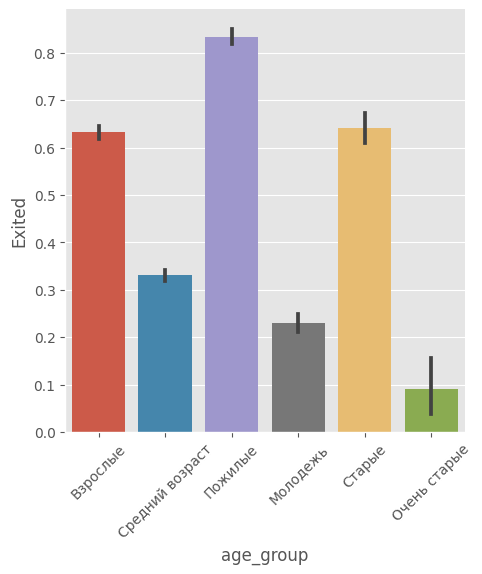

In [22]:
g = sb.catplot(x = "age_group", y = "Exited", data = df, kind = "bar")
plt.xticks(rotation=45)
g.set_ylabels("Exited")
plt.show()

### Подготовка данных для машинного обучения

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15926 entries, 0 to 15925
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CreditScore      15926 non-null  int64   
 1   Geography        15926 non-null  category
 2   Gender           15926 non-null  category
 3   Age              15926 non-null  int64   
 4   Tenure           15926 non-null  int64   
 5   Balance          15926 non-null  float64 
 6   NumOfProducts    15926 non-null  int64   
 7   HasCrCard        15926 non-null  int64   
 8   IsActiveMember   15926 non-null  int64   
 9   EstimatedSalary  15926 non-null  float64 
 10  Exited           15926 non-null  int64   
 11  age_group        15926 non-null  object  
dtypes: category(2), float64(2), int64(7), object(1)
memory usage: 1.2+ MB


In [24]:
train_column = ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
x = np.asanyarray(df[train_column])
y = np.asanyarray(df['Exited'])

In [25]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size= 0.3, random_state=1234)

In [26]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x_train = std.fit_transform(x_train)
x_test = std.transform(x_test)

### Обучение модели

In [27]:
!pip install xgboost
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

In [31]:
# Определение сетки гиперпараметров
xgb_params ={
        'n_estimators': [50, 100, 200],
        'subsample': [ 0.6, 0.8, 1.0],
        'max_depth': [1,2,3,4],
        'learning_rate': [0.1,0.2, 0.3, 0.4, 0.5],
        "min_samples_split": [1,2,4,6]}

# Создание классификатора XGBoost
classifier = XGBClassifier()

# Создание объекта GridSearchCV
grid_search = GridSearchCV(classifier, xgb_params, cv=5, scoring='accuracy')

# Fit объекта GridSearchCV к обучающим данным
grid_search.fit(x_train, y_train)

# Print лучших параметров
print(grid_search.best_params_)

{'learning_rate': 0.5, 'max_depth': 4, 'min_samples_split': 1, 'n_estimators': 200, 'subsample': 0.8}


In [32]:
xgbm_cv = XGBClassifier(learning_rate=0.5,
                       max_depth=4,
                       min_samples_split=1,
                       n_estimators=200,
                       subsample=0.8,
                       random_state=1234)
xgbm_cv.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, min_samples_split=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)

### Тест модели и демонстрация метрик

In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

In [34]:
temp_predict_1 = xgbm_cv.predict(x_train)
print('accuracy_score of train : ', accuracy_score(y_train, temp_predict_1))

temp_predict_2 = xgbm_cv.predict(x_test)
print('accuracy_score of test : ', accuracy_score(y_test, temp_predict_2))

accuracy_score of train :  0.9840904333263555
accuracy_score of test :  0.8450982150865548


In [35]:
temp_predict_1 = xgbm_cv.predict(x_train)
print('recall_score of train : ', recall_score(y_train, temp_predict_1))

temp_predict_2 = xgbm_cv.predict(x_test)
print('recall_score of test : ', recall_score(y_test, temp_predict_2))

recall_score of train :  0.9823529411764705
recall_score of test :  0.8713953071825183


In [36]:
temp_predict_1 = xgbm_cv.predict(x_train)
print('precision_score of train : ', precision_score(y_train, temp_predict_1))

temp_predict_2 = xgbm_cv.predict(x_test)
print('precision_score of test : ', precision_score(y_test, temp_predict_2))

precision_score of train :  0.9856661045531198
precision_score of test :  0.8282260810350698


In [37]:
temp_predict_1 = xgbm_cv.predict(x_train)
print('f1_score of train : ', f1_score(y_train, temp_predict_1))

temp_predict_2 = xgbm_cv.predict(x_test)
print('f1_score of test : ', f1_score(y_test, temp_predict_2))

f1_score of train :  0.984006734006734
f1_score of test :  0.8492624596316662


In [38]:
y_prediction = xgbm_cv.predict(x_test)

# F1-score
print(f'f1_score for reall y and prediction y : {f1_score(y_test, y_prediction)}')
print('-'*30)

# confusion matrix
print(f'confusion matrix for reall y and prediction y : \n{confusion_matrix(y_test, y_prediction)}')
print('-'*30)

# Accuracy Score
accuracy = accuracy_score(y_test, y_prediction)
print("Accuracy Score:", accuracy)
print('-'*30)

# Classification Report
classification_rep = classification_report(y_test, y_prediction)
print("Classification Report:")
print(classification_rep)
print('-'*30)

# ROC Curve and AUC
y_prob = xgbm_cv.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)
print("AUC: ", auc)
print('-'*30)

# Precision
precision = precision_score(y_test, y_prediction, average='macro')
print("Precision:", precision)
print('-'*30)

# Recall
recall = recall_score(y_test, y_prediction, average='macro')
print("Recall:", recall)
print('-'*30)

f1_score for reall y and prediction y : 0.8492624596316662
------------------------------
confusion matrix for reall y and prediction y : 
[[4557 1009]
 [ 718 4865]]
------------------------------
Accuracy Score: 0.8450982150865548
------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      5566
           1       0.83      0.87      0.85      5583

    accuracy                           0.85     11149
   macro avg       0.85      0.85      0.84     11149
weighted avg       0.85      0.85      0.84     11149

------------------------------
AUC:  0.9099726796266758
------------------------------
Precision: 0.8460561684796202
------------------------------
Recall: 0.8450580560346656
------------------------------


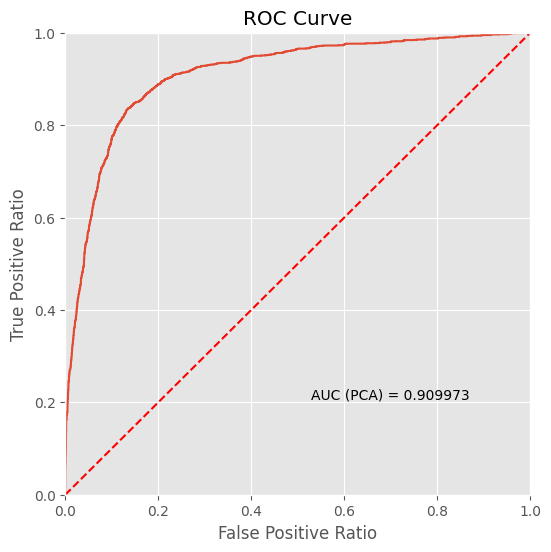

In [43]:
xgb_roc_auc = roc_auc_score(y_test,xgbm_cv.predict(x_test))

fpr, tpr, tresholds = roc_curve(y_test,xgbm_cv.predict_proba(x_test)[:,1])
plt.figure(figsize=(6,6))
plt.plot(fpr,tpr,label = "AUC (area = %0.2f)"%xgb_roc_auc)

auc = roc_auc_score(y_test, y_prob)
plt.text(0.7,0.2, f"AUC (PCA) = {format(auc, '4f')}",  ha='center', va='bottom')

plt.plot([0,1],[0,1],"r--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive Ratio")
plt.ylabel("True Positive Ratio")
plt.title('ROC Curve');

<Axes: title={'center': 'XGBoost Classification'}>

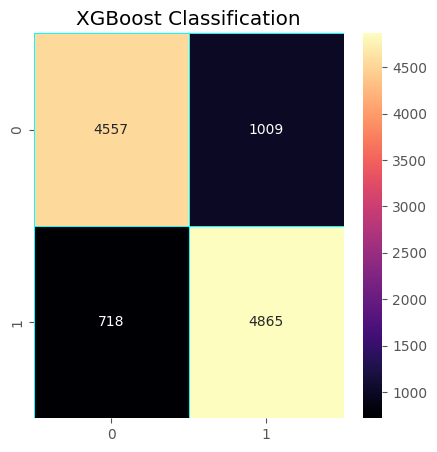

In [44]:
from sklearn.metrics import confusion_matrix
xgbm_cm = confusion_matrix(y_test,y_prediction)


fig = plt.figure(figsize=(5,5))
ax8 = fig.add_subplot(1, 1, 1)
ax8.set_title('XGBoost Classification')

sb.heatmap(data=xgbm_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax8, cmap='magma')

### Сохранение модели

In [41]:
from joblib import dump
dump(xgbm_cv, 'xgb_bank_model.pkl')

['xgb_bank_model.pkl']